# Is a good portion of an ML execution spent in C code?

In [1]:
import os
import glob
import seaborn as sns
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import matplotlib.pyplot as plt
%run profiler_helper.py

## Acquiring cProfile
We acquire the binary output of [cProfile](https://docs.python.org/3.7/library/profile.html#module-cProfile) by running:

`python -m cProfile -o output.cprof code_i_want_to_profile.py`

### Convolutional Neural Networks

In [3]:
# !python -m cProfile -o cifar10/cifar10_cnn.cprof cifar10/cifar10_cnn.py

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.189
[1,  4000] loss: 1.818
[1,  6000] loss: 1.640
[1,  8000] loss: 1.578
[1, 10000] loss: 1.516
[1, 12000] loss: 1.447
[2,  2000] loss: 1.374
[2,  4000] loss: 1.373
[2,  6000] loss: 1.332
[2,  8000] loss: 1.320
[2, 10000] loss: 1.306
[2, 12000] loss: 1.279
Finished Training
Accuracy of the network on the 10000 test images: 53 %


In [3]:
# !python -m cProfile -o cifar10/cifar10_cnn_2.cprof cifar10/cifar10_cnn_2.py

In [6]:
# !python -m cProfile -o mnist/mnist_cnn.cprof mnist/mnist_cnn.py

Processing...
Done!
[1,  2000] loss: 0.317
[1,  4000] loss: 0.109
[1,  6000] loss: 0.082
[1,  8000] loss: 0.072
[1, 10000] loss: 0.071
[1, 12000] loss: 0.061
[1, 14000] loss: 0.054
[2,  2000] loss: 0.050
[2,  4000] loss: 0.036
[2,  6000] loss: 0.041
[2,  8000] loss: 0.035
[2, 10000] loss: 0.040
[2, 12000] loss: 0.035
[2, 14000] loss: 0.037
Finished Training
Accuracy of the network on the 10000 test images: 98 %


In [22]:
!python -m cProfile -o GANs/mnist_gan.cprof GANs/mnist_gan.py

Epoch [0/20], Step [600/600], d_loss: 0.1415, g_loss: 4.7808, D(x): 0.93, D(G(z)): 0.06
Epoch [1/20], Step [600/600], d_loss: 0.2239, g_loss: 4.7034, D(x): 0.92, D(G(z)): 0.07
Epoch [2/20], Step [600/600], d_loss: 1.2165, g_loss: 1.7609, D(x): 0.74, D(G(z)): 0.40
Epoch [3/20], Step [600/600], d_loss: 0.5476, g_loss: 3.0661, D(x): 0.88, D(G(z)): 0.23
Epoch [4/20], Step [600/600], d_loss: 0.1495, g_loss: 3.4262, D(x): 0.96, D(G(z)): 0.08
Epoch [5/20], Step [600/600], d_loss: 0.1148, g_loss: 4.7976, D(x): 0.95, D(G(z)): 0.02
Epoch [6/20], Step [600/600], d_loss: 0.2035, g_loss: 3.9171, D(x): 0.93, D(G(z)): 0.07
Epoch [7/20], Step [600/600], d_loss: 0.1828, g_loss: 4.3329, D(x): 0.96, D(G(z)): 0.09
Epoch [8/20], Step [600/600], d_loss: 0.1564, g_loss: 4.6253, D(x): 0.94, D(G(z)): 0.01
Epoch [9/20], Step [600/600], d_loss: 0.2558, g_loss: 6.1916, D(x): 0.94, D(G(z)): 0.06
Epoch [10/20], Step [600/600], d_loss: 0.1214, g_loss: 4.1723, D(x): 0.98, D(G(z)): 0.08
Epoch [11/20], Step [600/600], 

### Generative Adversarial Networks

In [4]:
!cd GANs && python -m cProfile -o cifar10_dcgan.cprof cifar10_dcgan.py --dataset cifar10 --dataroot ../data/ --imageSize 32 --outf cifar10_gan_samples --manualSeed 15 --niter 1

Namespace(batchSize=64, beta1=0.5, cuda=False, dataroot='../data/', dataset='cifar10', imageSize=32, lr=0.0002, manualSeed=15, ndf=64, netD='', netG='', ngf=64, ngpu=1, niter=1, nz=100, outf='cifar10_gan_samples', workers=2)
start_time: 1562947328.1902459
Random Seed:  15
Files already downloaded and verified
Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace)
    (9): ConvTranspose2d(128, 64, kerne

[0/1][73/782] Loss_D: 1.4344 Loss_G: 3.5359 D(x): 0.8305 D(G(z)): 0.6540 / 0.0559
[0/1][74/782] Loss_D: 1.0637 Loss_G: 2.6827 D(x): 0.4732 D(G(z)): 0.1398 / 0.1054
[0/1][75/782] Loss_D: 0.8878 Loss_G: 1.8218 D(x): 0.6727 D(G(z)): 0.3162 / 0.1877
[0/1][76/782] Loss_D: 1.2143 Loss_G: 2.8230 D(x): 0.7591 D(G(z)): 0.5623 / 0.0802
[0/1][77/782] Loss_D: 1.0531 Loss_G: 2.4605 D(x): 0.5473 D(G(z)): 0.2862 / 0.1065
[0/1][78/782] Loss_D: 1.0639 Loss_G: 2.1694 D(x): 0.6125 D(G(z)): 0.3809 / 0.1391
[0/1][79/782] Loss_D: 1.1064 Loss_G: 2.4719 D(x): 0.6521 D(G(z)): 0.4318 / 0.1133
[0/1][80/782] Loss_D: 1.1458 Loss_G: 2.4217 D(x): 0.5930 D(G(z)): 0.3908 / 0.1121
[0/1][81/782] Loss_D: 1.1019 Loss_G: 2.8968 D(x): 0.6383 D(G(z)): 0.4327 / 0.0672
[0/1][82/782] Loss_D: 0.9793 Loss_G: 2.3468 D(x): 0.5496 D(G(z)): 0.2392 / 0.1093
[0/1][83/782] Loss_D: 0.9890 Loss_G: 1.9776 D(x): 0.5603 D(G(z)): 0.2563 / 0.1641
[0/1][84/782] Loss_D: 1.1282 Loss_G: 2.7701 D(x): 0.6919 D(G(z)): 0.4733 / 0.0827
[0/1][85/782] Lo

[0/1][173/782] Loss_D: 1.0800 Loss_G: 1.4954 D(x): 0.6080 D(G(z)): 0.3786 / 0.2523
[0/1][174/782] Loss_D: 1.3230 Loss_G: 2.4694 D(x): 0.6510 D(G(z)): 0.5089 / 0.1052
[0/1][175/782] Loss_D: 1.2246 Loss_G: 1.6298 D(x): 0.4608 D(G(z)): 0.2320 / 0.2255
[0/1][176/782] Loss_D: 1.2440 Loss_G: 1.9472 D(x): 0.6771 D(G(z)): 0.5221 / 0.1646
[0/1][177/782] Loss_D: 0.9302 Loss_G: 2.0616 D(x): 0.5915 D(G(z)): 0.2721 / 0.1577
[0/1][178/782] Loss_D: 0.8571 Loss_G: 1.9324 D(x): 0.6775 D(G(z)): 0.3323 / 0.1690
[0/1][179/782] Loss_D: 0.8711 Loss_G: 1.8399 D(x): 0.6170 D(G(z)): 0.2742 / 0.1920
[0/1][180/782] Loss_D: 0.9851 Loss_G: 1.9040 D(x): 0.6845 D(G(z)): 0.4067 / 0.1724
[0/1][181/782] Loss_D: 0.7830 Loss_G: 2.4347 D(x): 0.7214 D(G(z)): 0.3344 / 0.1062
[0/1][182/782] Loss_D: 0.8815 Loss_G: 1.9374 D(x): 0.6103 D(G(z)): 0.2593 / 0.1671
[0/1][183/782] Loss_D: 0.9619 Loss_G: 2.2546 D(x): 0.6656 D(G(z)): 0.3839 / 0.1269
[0/1][184/782] Loss_D: 0.9180 Loss_G: 2.1400 D(x): 0.6007 D(G(z)): 0.2582 / 0.1480
[0/1

[0/1][272/782] Loss_D: 0.4208 Loss_G: 3.3848 D(x): 0.7671 D(G(z)): 0.1102 / 0.0442
[0/1][273/782] Loss_D: 0.3541 Loss_G: 3.2617 D(x): 0.8389 D(G(z)): 0.1491 / 0.0482
[0/1][274/782] Loss_D: 0.5038 Loss_G: 3.4647 D(x): 0.8370 D(G(z)): 0.2517 / 0.0385
[0/1][275/782] Loss_D: 0.7228 Loss_G: 2.4710 D(x): 0.6427 D(G(z)): 0.1919 / 0.1015
[0/1][276/782] Loss_D: 0.6386 Loss_G: 3.7166 D(x): 0.8743 D(G(z)): 0.3718 / 0.0330
[0/1][277/782] Loss_D: 0.6270 Loss_G: 2.9138 D(x): 0.6676 D(G(z)): 0.1508 / 0.0667
[0/1][278/782] Loss_D: 0.4255 Loss_G: 2.8048 D(x): 0.8104 D(G(z)): 0.1808 / 0.0690
[0/1][279/782] Loss_D: 0.8542 Loss_G: 3.0722 D(x): 0.7047 D(G(z)): 0.3496 / 0.0640
[0/1][280/782] Loss_D: 0.8546 Loss_G: 2.7712 D(x): 0.6171 D(G(z)): 0.2571 / 0.0771
[0/1][281/782] Loss_D: 0.7908 Loss_G: 3.3729 D(x): 0.7110 D(G(z)): 0.3216 / 0.0411
[0/1][282/782] Loss_D: 0.4294 Loss_G: 3.0896 D(x): 0.7565 D(G(z)): 0.1213 / 0.0550
[0/1][283/782] Loss_D: 0.5414 Loss_G: 3.1102 D(x): 0.7973 D(G(z)): 0.2509 / 0.0504
[0/1

[0/1][371/782] Loss_D: 0.5899 Loss_G: 3.8749 D(x): 0.7963 D(G(z)): 0.2724 / 0.0246
[0/1][372/782] Loss_D: 0.5824 Loss_G: 4.5539 D(x): 0.7868 D(G(z)): 0.2645 / 0.0125
[0/1][373/782] Loss_D: 0.6025 Loss_G: 3.1902 D(x): 0.6843 D(G(z)): 0.1303 / 0.0473
[0/1][374/782] Loss_D: 1.1336 Loss_G: 6.1065 D(x): 0.7877 D(G(z)): 0.5495 / 0.0031
[0/1][375/782] Loss_D: 0.8450 Loss_G: 3.4861 D(x): 0.5178 D(G(z)): 0.0307 / 0.0499
[0/1][376/782] Loss_D: 0.7761 Loss_G: 4.0632 D(x): 0.8098 D(G(z)): 0.3831 / 0.0226
[0/1][377/782] Loss_D: 0.6907 Loss_G: 4.9528 D(x): 0.8107 D(G(z)): 0.3423 / 0.0094
[0/1][378/782] Loss_D: 0.6547 Loss_G: 3.1826 D(x): 0.6236 D(G(z)): 0.1142 / 0.0476
[0/1][379/782] Loss_D: 0.7679 Loss_G: 4.8281 D(x): 0.8131 D(G(z)): 0.3901 / 0.0104
[0/1][380/782] Loss_D: 0.7749 Loss_G: 2.6346 D(x): 0.5790 D(G(z)): 0.1227 / 0.0866
[0/1][381/782] Loss_D: 0.7101 Loss_G: 5.0854 D(x): 0.8697 D(G(z)): 0.4020 / 0.0099
[0/1][382/782] Loss_D: 0.8753 Loss_G: 2.7404 D(x): 0.5309 D(G(z)): 0.1107 / 0.0826
[0/1

[0/1][470/782] Loss_D: 0.4512 Loss_G: 3.7808 D(x): 0.8568 D(G(z)): 0.2365 / 0.0285
[0/1][471/782] Loss_D: 0.3581 Loss_G: 4.1464 D(x): 0.8450 D(G(z)): 0.1524 / 0.0216
[0/1][472/782] Loss_D: 0.2716 Loss_G: 3.6799 D(x): 0.8303 D(G(z)): 0.0698 / 0.0315
[0/1][473/782] Loss_D: 0.2332 Loss_G: 3.7440 D(x): 0.9184 D(G(z)): 0.1278 / 0.0300
[0/1][474/782] Loss_D: 0.2386 Loss_G: 3.8603 D(x): 0.9106 D(G(z)): 0.1227 / 0.0281
[0/1][475/782] Loss_D: 0.3285 Loss_G: 3.6480 D(x): 0.8760 D(G(z)): 0.1670 / 0.0341
[0/1][476/782] Loss_D: 0.4685 Loss_G: 4.0494 D(x): 0.8548 D(G(z)): 0.2443 / 0.0244
[0/1][477/782] Loss_D: 0.5335 Loss_G: 2.5085 D(x): 0.6851 D(G(z)): 0.0854 / 0.1081
[0/1][478/782] Loss_D: 0.8196 Loss_G: 3.9148 D(x): 0.7982 D(G(z)): 0.3947 / 0.0282
[0/1][479/782] Loss_D: 0.4099 Loss_G: 3.2740 D(x): 0.7603 D(G(z)): 0.0899 / 0.0474
[0/1][480/782] Loss_D: 0.5303 Loss_G: 3.2270 D(x): 0.8191 D(G(z)): 0.2393 / 0.0552
[0/1][481/782] Loss_D: 0.4527 Loss_G: 2.8501 D(x): 0.7518 D(G(z)): 0.1136 / 0.0759
[0/1

[0/1][569/782] Loss_D: 0.6815 Loss_G: 3.5485 D(x): 0.5820 D(G(z)): 0.0524 / 0.0537
[0/1][570/782] Loss_D: 0.7048 Loss_G: 2.8678 D(x): 0.7464 D(G(z)): 0.2445 / 0.0782
[0/1][571/782] Loss_D: 0.5569 Loss_G: 3.7969 D(x): 0.8123 D(G(z)): 0.2516 / 0.0280
[0/1][572/782] Loss_D: 0.5864 Loss_G: 3.4747 D(x): 0.7443 D(G(z)): 0.1937 / 0.0424
[0/1][573/782] Loss_D: 0.7885 Loss_G: 4.1132 D(x): 0.8012 D(G(z)): 0.3763 / 0.0230
[0/1][574/782] Loss_D: 0.7951 Loss_G: 2.4114 D(x): 0.5918 D(G(z)): 0.1084 / 0.1095
[0/1][575/782] Loss_D: 0.7825 Loss_G: 3.2879 D(x): 0.8098 D(G(z)): 0.3825 / 0.0499
[0/1][576/782] Loss_D: 0.8517 Loss_G: 3.3981 D(x): 0.6908 D(G(z)): 0.3098 / 0.0484
[0/1][577/782] Loss_D: 0.6558 Loss_G: 2.8866 D(x): 0.7078 D(G(z)): 0.2075 / 0.0721
[0/1][578/782] Loss_D: 0.7201 Loss_G: 2.3275 D(x): 0.6763 D(G(z)): 0.2097 / 0.1212
[0/1][579/782] Loss_D: 0.8724 Loss_G: 4.1980 D(x): 0.8364 D(G(z)): 0.4555 / 0.0194
[0/1][580/782] Loss_D: 0.5395 Loss_G: 3.2108 D(x): 0.6584 D(G(z)): 0.0541 / 0.0554
[0/1

[0/1][668/782] Loss_D: 0.9615 Loss_G: 2.6898 D(x): 0.5779 D(G(z)): 0.2493 / 0.0901
[0/1][669/782] Loss_D: 1.4311 Loss_G: 5.1643 D(x): 0.7372 D(G(z)): 0.5765 / 0.0104
[0/1][670/782] Loss_D: 0.5891 Loss_G: 4.1036 D(x): 0.6633 D(G(z)): 0.0715 / 0.0312
[0/1][671/782] Loss_D: 0.9183 Loss_G: 2.4163 D(x): 0.6397 D(G(z)): 0.2660 / 0.1245
[0/1][672/782] Loss_D: 0.9042 Loss_G: 4.2605 D(x): 0.8241 D(G(z)): 0.4581 / 0.0184
[0/1][673/782] Loss_D: 0.7293 Loss_G: 3.0919 D(x): 0.6161 D(G(z)): 0.0905 / 0.0665
[0/1][674/782] Loss_D: 0.5945 Loss_G: 2.7082 D(x): 0.7824 D(G(z)): 0.2552 / 0.0788
[0/1][675/782] Loss_D: 1.0974 Loss_G: 3.4430 D(x): 0.6939 D(G(z)): 0.4522 / 0.0402
[0/1][676/782] Loss_D: 0.9185 Loss_G: 3.4866 D(x): 0.6393 D(G(z)): 0.2808 / 0.0417
[0/1][677/782] Loss_D: 0.5779 Loss_G: 2.6108 D(x): 0.6962 D(G(z)): 0.1085 / 0.0935
[0/1][678/782] Loss_D: 1.1029 Loss_G: 4.7625 D(x): 0.8536 D(G(z)): 0.5496 / 0.0129
[0/1][679/782] Loss_D: 0.9683 Loss_G: 3.3673 D(x): 0.5104 D(G(z)): 0.0633 / 0.0600
[0/1

[0/1][767/782] Loss_D: 1.7328 Loss_G: 2.0505 D(x): 0.2438 D(G(z)): 0.0816 / 0.1796
[0/1][768/782] Loss_D: 1.0032 Loss_G: 3.4642 D(x): 0.8521 D(G(z)): 0.5124 / 0.0408
[0/1][769/782] Loss_D: 0.4199 Loss_G: 3.8840 D(x): 0.8015 D(G(z)): 0.1558 / 0.0298
[0/1][770/782] Loss_D: 0.7193 Loss_G: 2.7301 D(x): 0.6573 D(G(z)): 0.1730 / 0.0882
[0/1][771/782] Loss_D: 1.1300 Loss_G: 4.3034 D(x): 0.8038 D(G(z)): 0.5260 / 0.0211
[0/1][772/782] Loss_D: 0.4926 Loss_G: 3.7250 D(x): 0.6910 D(G(z)): 0.0631 / 0.0314
[0/1][773/782] Loss_D: 0.4517 Loss_G: 3.0568 D(x): 0.8034 D(G(z)): 0.1811 / 0.0668
[0/1][774/782] Loss_D: 0.6020 Loss_G: 3.7762 D(x): 0.8542 D(G(z)): 0.3211 / 0.0328
[0/1][775/782] Loss_D: 0.6543 Loss_G: 2.6920 D(x): 0.6427 D(G(z)): 0.1463 / 0.0934
[0/1][776/782] Loss_D: 0.9763 Loss_G: 4.2548 D(x): 0.8557 D(G(z)): 0.4826 / 0.0219
[0/1][777/782] Loss_D: 1.0635 Loss_G: 2.8328 D(x): 0.5177 D(G(z)): 0.1852 / 0.0762
[0/1][778/782] Loss_D: 0.7235 Loss_G: 3.0463 D(x): 0.7304 D(G(z)): 0.2974 / 0.0586
[0/1

In [10]:
!cd GANs && python -m cProfile -o mnist_gan_2.cprof mnist_gan_2.py

start_time: 1562954479.423651
Epoch [0/2], Step [200/1875], d_loss: 0.0434, g_loss: 4.4112, D(x): 1.00, D(G(z)): 0.04
Epoch [0/2], Step [400/1875], d_loss: 0.0324, g_loss: 5.8481, D(x): 1.00, D(G(z)): 0.03
Epoch [0/2], Step [600/1875], d_loss: 0.0152, g_loss: 5.4736, D(x): 1.00, D(G(z)): 0.01
Epoch [0/2], Step [800/1875], d_loss: 0.0589, g_loss: 5.7077, D(x): 0.99, D(G(z)): 0.05
Epoch [0/2], Step [1000/1875], d_loss: 0.0875, g_loss: 4.9482, D(x): 0.96, D(G(z)): 0.03
Epoch [0/2], Step [1200/1875], d_loss: 0.4581, g_loss: 2.6647, D(x): 0.83, D(G(z)): 0.15
Epoch [0/2], Step [1400/1875], d_loss: 0.0555, g_loss: 5.1332, D(x): 0.98, D(G(z)): 0.04
Epoch [0/2], Step [1600/1875], d_loss: 0.3165, g_loss: 4.7968, D(x): 0.88, D(G(z)): 0.02
Epoch [0/2], Step [1800/1875], d_loss: 0.2672, g_loss: 4.6823, D(x): 0.88, D(G(z)): 0.04
Epoch [1/2], Step [200/1875], d_loss: 0.3462, g_loss: 2.6580, D(x): 0.96, D(G(z)): 0.22
Epoch [1/2], Step [400/1875], d_loss: 0.2925, g_loss: 3.0825, D(x): 0.90, D(G(z)): 0.

### Logistic Regression

In [6]:
!cd LogRegs && python -m cProfile -o titanic_logreg.cprof titanic_logreg.py

% of missing "Age" records: 19.865319865319865
% of missing "Cabin" records: 77.10437710437711
% of missing "Embarked" records: 0.22446689113355783
Selected features: ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Sex_male', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F']
test accuracy: 0.8212290502793296
--- 0.07399702072143555 seconds ---


In [23]:
!cd LogRegs && python -m cProfile -o mnist_logreg.cprof mnist_logreg.py

Traceback (most recent call last):
  File "/anaconda3/envs/stat157/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/envs/stat157/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/envs/stat157/lib/python3.7/cProfile.py", line 173, in <module>
    main()
  File "/anaconda3/envs/stat157/lib/python3.7/cProfile.py", line 166, in main
    runctx(code, globs, None, options.outfile, options.sort)
  File "/anaconda3/envs/stat157/lib/python3.7/cProfile.py", line 20, in runctx
    filename, sort)
  File "/anaconda3/envs/stat157/lib/python3.7/profile.py", line 62, in runctx
    prof.runctx(statement, globals, locals)
  File "/anaconda3/envs/stat157/lib/python3.7/cProfile.py", line 100, in runctx
    exec(cmd, globals, locals)
  File "mnist_logreg.py", line 11, in <module>
    from tensorflow.examples.tutorials.mnist import input_data
ModuleNotFoundError: No module named 'tensorflow.examples'


## Loading cProfile binary into pandas DataFrame

In [4]:
df = to_df('cifar10/cifar10_cnn.cprof')

## Preprocess plf column to extract relevant modules from text

Do you see text like `{built-in method torch._C._get_tracing_state}`? I can't use that. I need to transform it so I extract the module name and function name from such strings. The template class below is like a cookie cutter. You press it down on a string and the remainder is the module name and function name (two-tuple).

In [2]:
for f in glob.glob('**/*.cprof'):
    print(f)    
    if 'cifar10_dcgan.cprof' not in f:
        toby.validate(to_df(f))

mnist/mnist_cnn.cprof
mnist/mnist_cnn.py:10(__init__)
mnist/mnist_cnn.py:17(forward)
mnist/mnist_cnn.py:9(Net)
mnist/mnist_cnn.py:1(<module>)
Validation failed.
CNNs/deep_dream_cnn.cprof
Validation success.
LogRegs/titanic_logreg.cprof
:1(_AttributesAttributes)
:1(<module>)
<attrs generated eq 9ca99882f664fc2e90451dc3f84bae5f1d4151a5>:1(<module>)
<attrs generated hash f6c65a6e64121ccdb2b86c94c4307d4d22c02927>:1(<module>)
<attrs generated eq a9dc62c45b46fbbefc1452e7034540b701b67bb1>:1(<module>)
:1(FactoryAttributes)
<attrs generated eq a811577e60d2eaaa10211eb41e0a6fedb52abe68>:1(<module>)
<attrs generated hash 07eeb15f57bfd99ed84eed207b4cba71f54cf707>:1(<module>)
:1(_AndValidatorAttributes)
<attrs generated eq 7fa391520e2e52d4103c11603e76f86aa306477c>:1(<module>)
<attrs generated hash 7288a60464b4b0a65c9147ce89d9e15ce0fefe55>:1(<module>)
<attrs generated init 7fa391520e2e52d4103c11603e76f86aa306477c>:1(<module>)
:1(_InstanceOfValidatorAttributes)
<attrs generated eq b9b268420a0b58f85530

Validation failed.


In [7]:
toby.validate(to_df('CNNs/deep_dream_cnn.cprof'))

Validation success.


## Performance Analysis of Python ML Workflows

In [2]:
cprofs = glob.glob('**/*.cprof')
df_list = list(map(to_df, cprofs))
c_df_list = list(map(get_c_df, df_list))
for c_df in c_df_list:
    # Discretize ncalls into 10 buckets
    c_df['ncalls_group'] = pd.cut(c_df['ncalls'], 10)

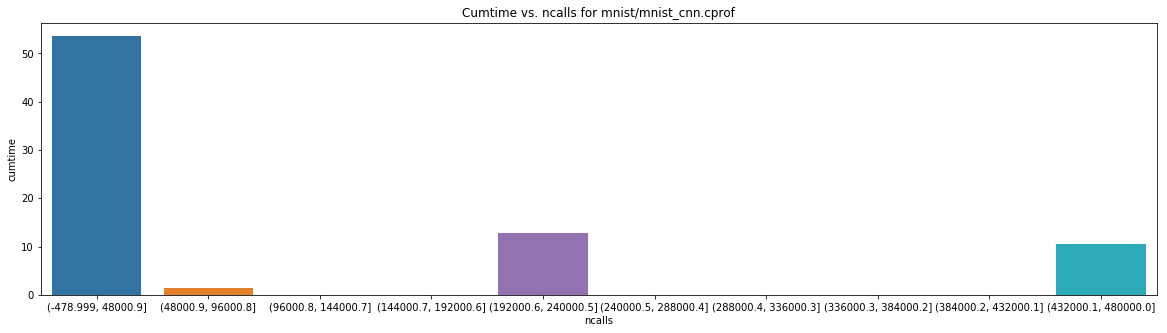

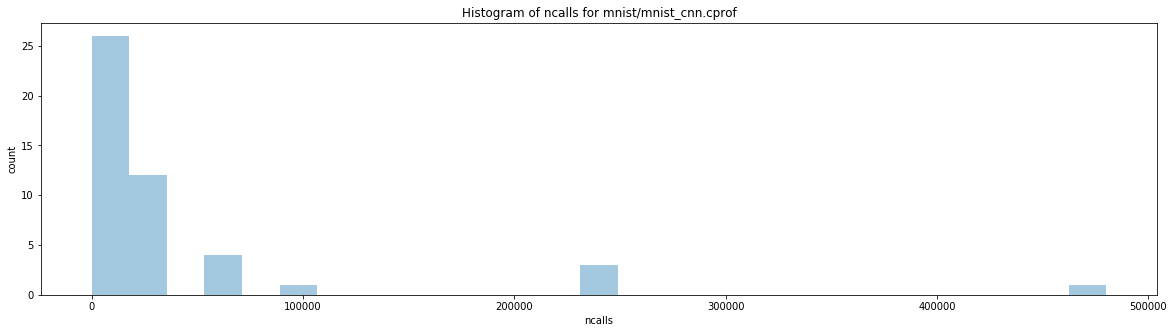

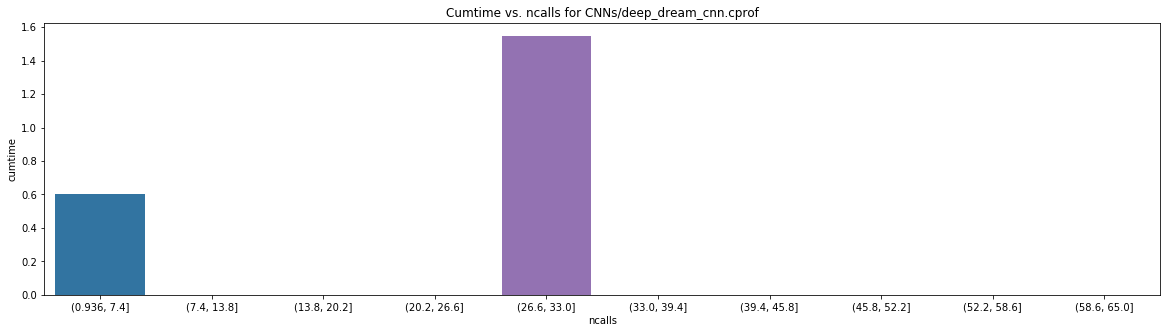

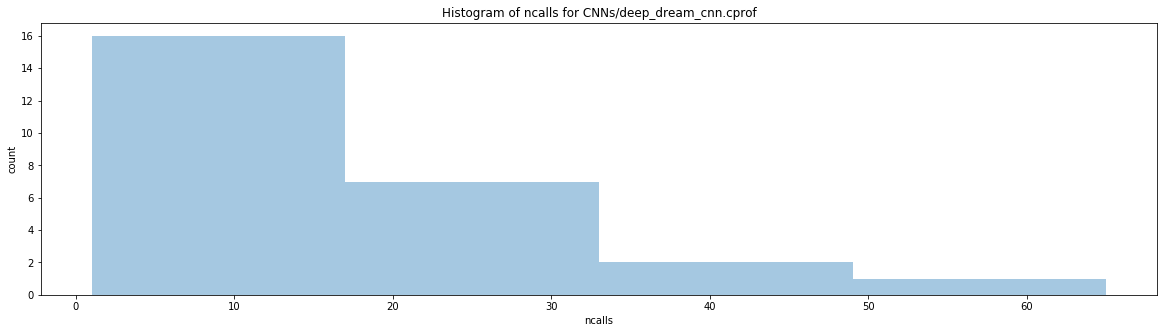

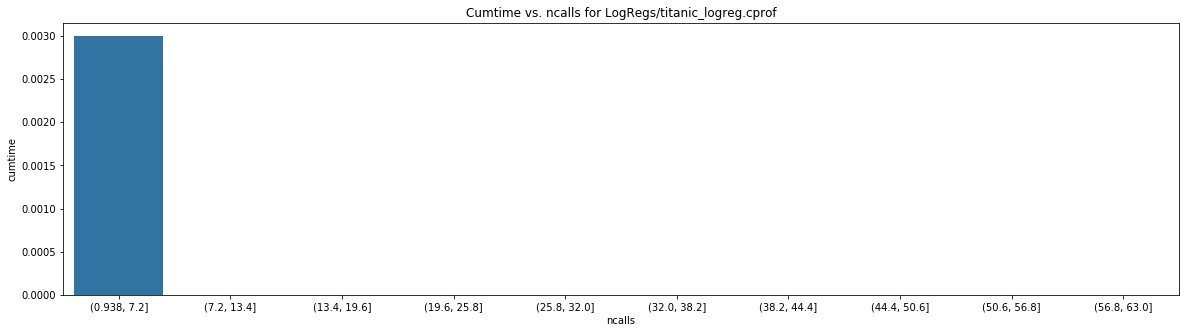

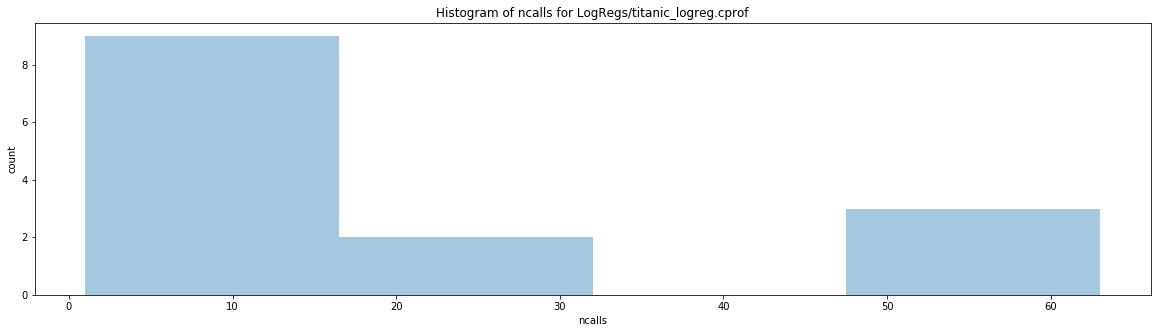

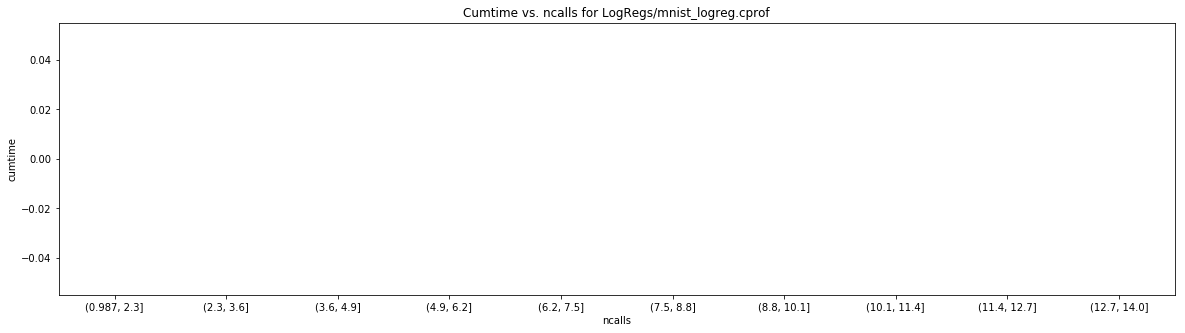

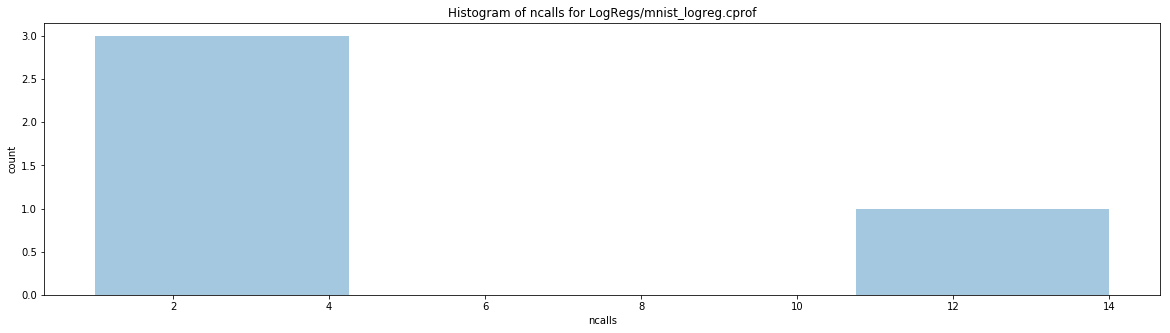

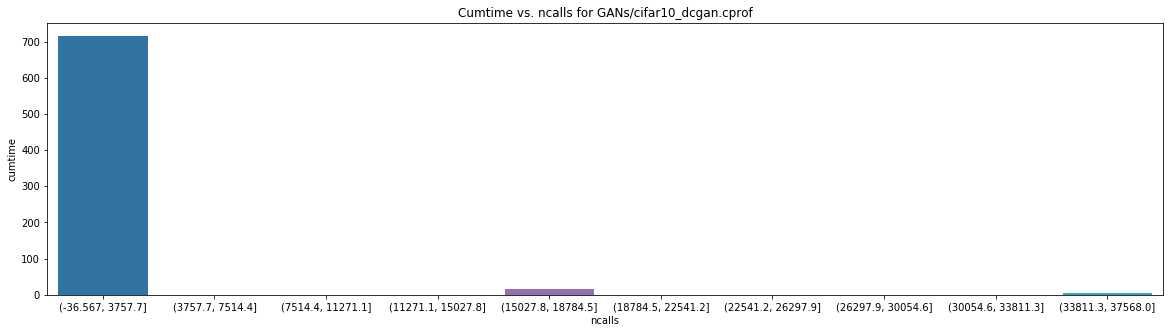

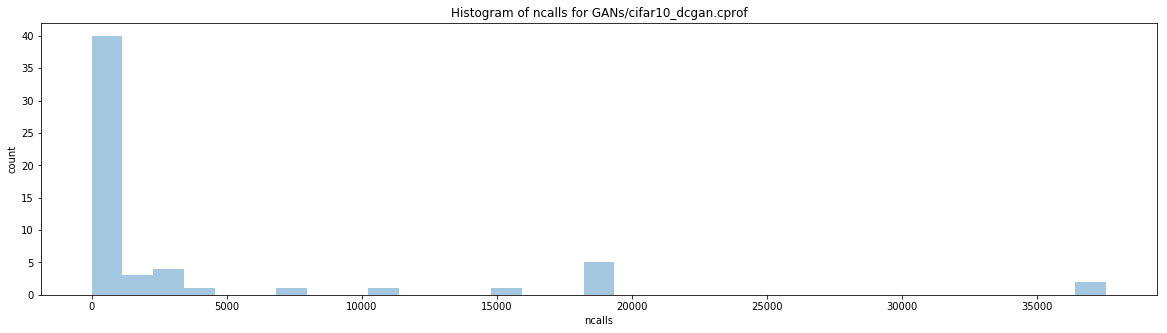

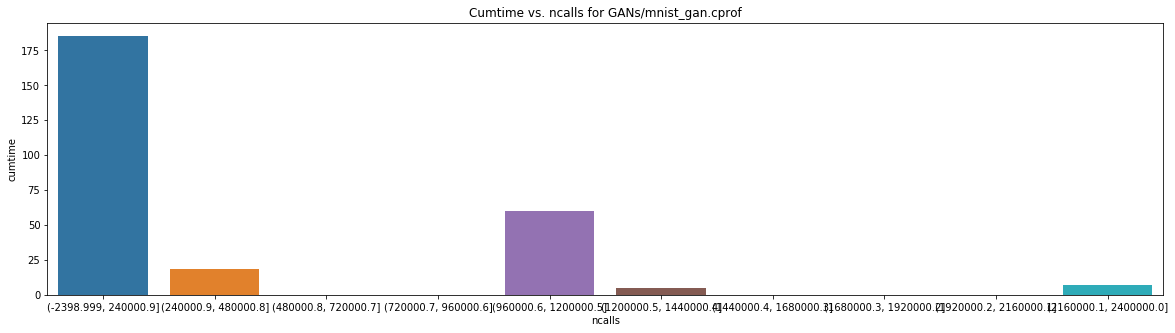

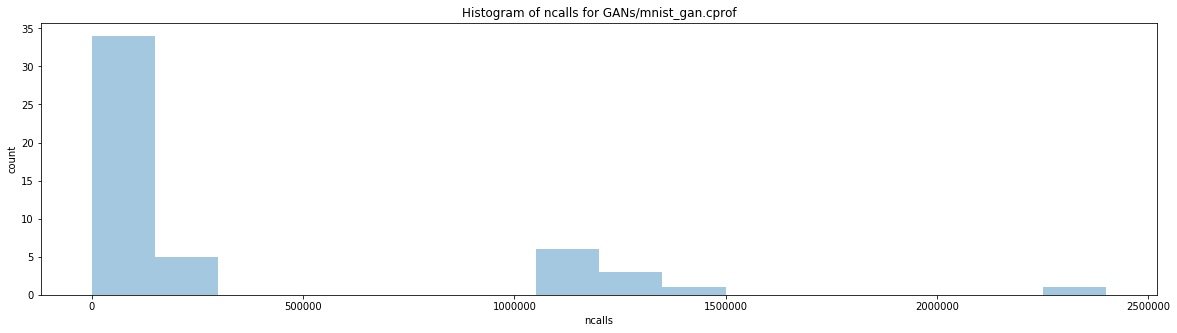

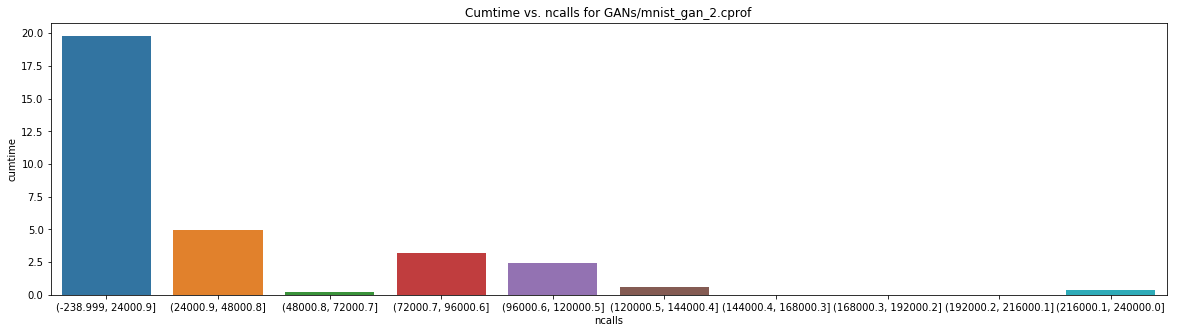

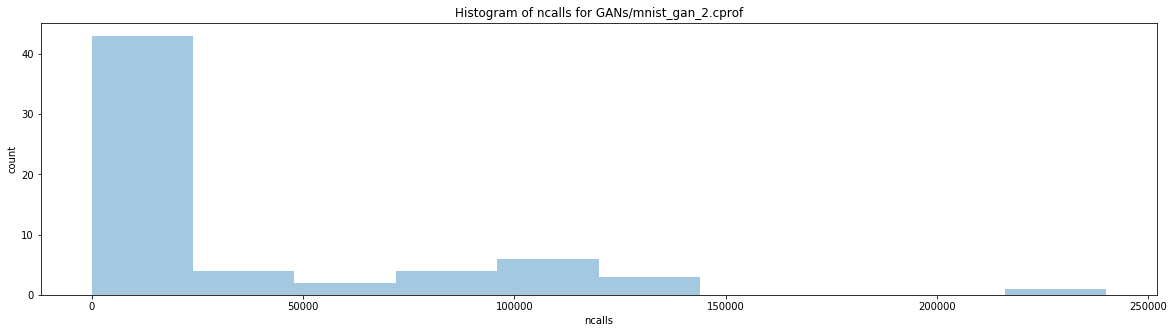

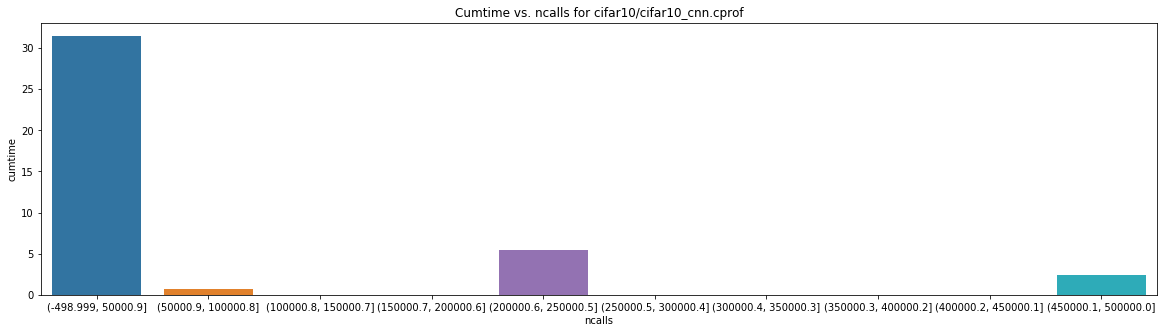

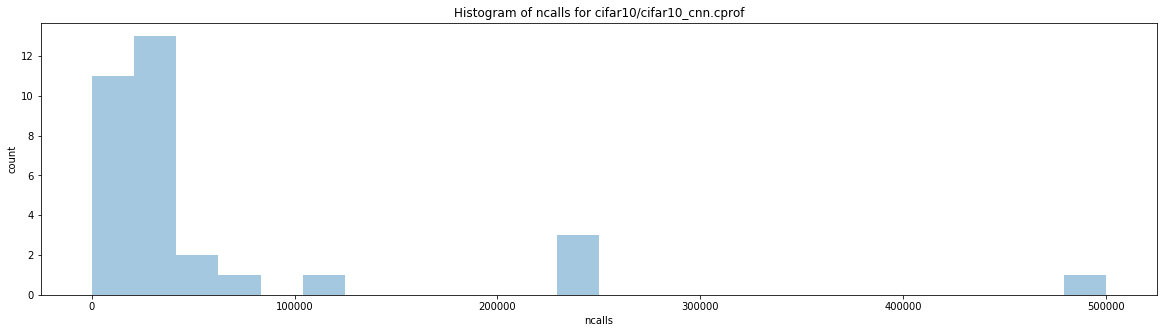

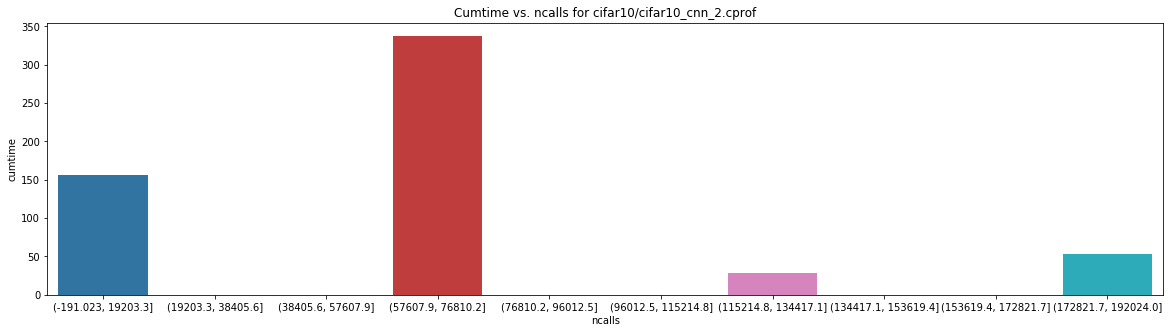

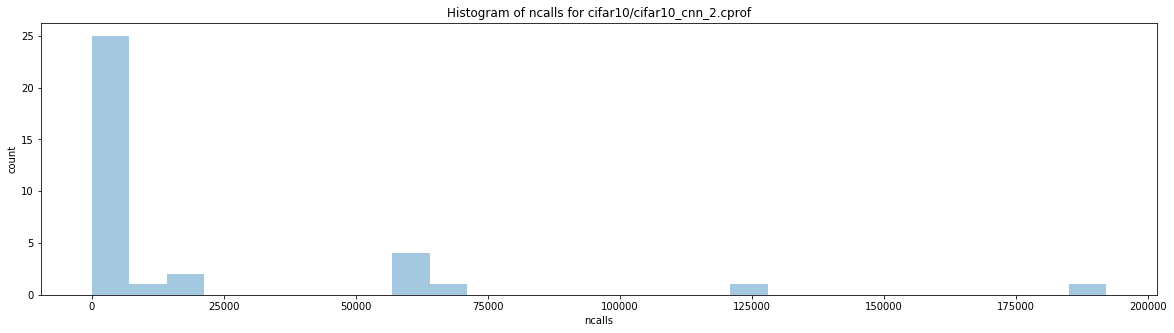

In [3]:
for i, c_df in enumerate(c_df_list):
    c_df_grouped = c_df.groupby('ncalls_group').sum()
    c_df_grouped.reset_index(inplace=True)
    plt.figure(figsize=(20, 5))
    plt.title('Cumtime vs. ncalls for ' + cprofs[i])
    sns.barplot(x='ncalls_group', y='cumtime', data=c_df_grouped)
    plt.xlabel('ncalls')
    plt.show()

    plt.figure(figsize=(20, 5))
    plt.title('Histogram of ncalls for ' + cprofs[i])
    sns.distplot(c_df['ncalls'].astype('int'), kde=False)
    plt.ylabel('count')
    plt.show()

In [4]:
for f in glob.glob('**/*.cprof'):
    print('{0}: {1:.3%}'.format(f, get_c_fraction(f)))
cprofs = glob.glob('**/*.cprof')
print(cprofs)
fractions = np.array(list(map(get_c_fraction, cprofs)))
print('fractions:', fractions)
print('mean:', np.mean(fractions))
print('std:', np.std(fractions))

mnist/mnist_cnn.cprof: 58.406%
CNNs/deep_dream_cnn.cprof: 59.961%
LogRegs/titanic_logreg.cprof: 0.419%
GANs/cifar10_dcgan.cprof: 26.215%
GANs/mnist_gan.cprof: 55.528%
GANs/mnist_gan_2.cprof: 58.749%
cifar10/cifar10_cnn.cprof: 48.989%
cifar10/cifar10_cnn_2.cprof: 86.201%
['mnist/mnist_cnn.cprof', 'CNNs/deep_dream_cnn.cprof', 'LogRegs/titanic_logreg.cprof', 'GANs/cifar10_dcgan.cprof', 'GANs/mnist_gan.cprof', 'GANs/mnist_gan_2.cprof', 'cifar10/cifar10_cnn.cprof', 'cifar10/cifar10_cnn_2.cprof']
fractions: [0.58406452 0.59960937 0.00418994 0.26214774 0.5552816  0.58749347
 0.48988756 0.86200514]
mean: 0.4930849191618524
std: 0.24001791036624304


The ML workflows tested spend, on average, 49.308% of their total execution time in C, with a standard deviation of around 24.002%.

In [5]:
cprofs = glob.glob('**/*cnn*.cprof')
print(cprofs)
fractions = np.array(list(map(get_c_fraction, cprofs)))
print('fractions:', fractions)
print('mean:', np.mean(fractions))
print('std:', np.std(fractions))

['mnist/mnist_cnn.cprof', 'CNNs/deep_dream_cnn.cprof', 'cifar10/cifar10_cnn.cprof', 'cifar10/cifar10_cnn_2.cprof']
fractions: [0.58406452 0.59960937 0.48988756 0.86200514]
mean: 0.6338916495074247
std: 0.13823074937176374


On average, CNNs spend about 63.389% of their total execution time (with a standard deviation of 13.823%) in C code.

In [6]:
cprofs = glob.glob('**/*gan*.cprof')
print(cprofs)
fractions = np.array(list(map(get_c_fraction, cprofs)))
print('fractions:', fractions)
print('mean:', np.mean(fractions))
print('std:', np.std(fractions))

['GANs/cifar10_dcgan.cprof', 'GANs/mnist_gan.cprof', 'GANs/mnist_gan_2.cprof']
fractions: [0.26214774 0.5552816  0.58749347]
mean: 0.46830760371034746
std: 0.1463689791273008


On average, GANs spend about 46.831% of their total execution time (with a standard deviation of 14.637%) in C code.

In [7]:
reg_cprofs = glob.glob('**/*reg.cprof')
reg_cprofs

['LogRegs/titanic_logreg.cprof']